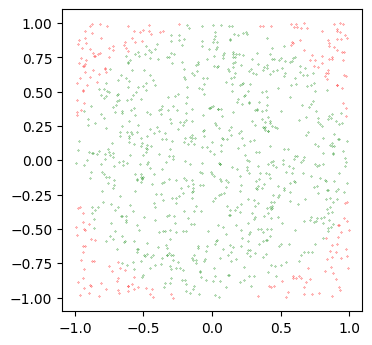

In [18]:
import random as rnd
import matplotlib.pyplot as plt
import numpy as np

# function that randomizes points within the square -1 to 1 on both x and y

# plots points inside circle as green and red outside

# take number of points inside divided by total number of points
# multiply with 4
# final: test with different radii and see if there's a relation 
# (plot the number above against radius)

# Radius of board
radius = 1
# Number of random points
Ncoords = 1000

# Coordinates of random points
xcoords = [2*radius*rnd.random()-radius for _ in range(Ncoords)]
ycoords = [2*radius*rnd.random()-radius for _ in range(Ncoords)]

# Set settings for plots
fig, ax = plt.figure(dpi=100), plt.axes()
ax.set_aspect(1)
# Set colours to each points
for xcoord, ycoord in zip(xcoords, ycoords):
    
    origdistance = np.sqrt(xcoord**2 + ycoord**2)
    if origdistance <= radius:
        colour = 'g'
    else:
        colour = 'r'
    
    # Plot
    ax.plot(xcoord, ycoord, '.', markersize=1, color=colour)





In [10]:
import random as rnd
print(rnd.random()*2-1)

-0.6668769580455574
